<a href="https://colab.research.google.com/github/marclamberts/football-analysis/blob/main/Scatterplot_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


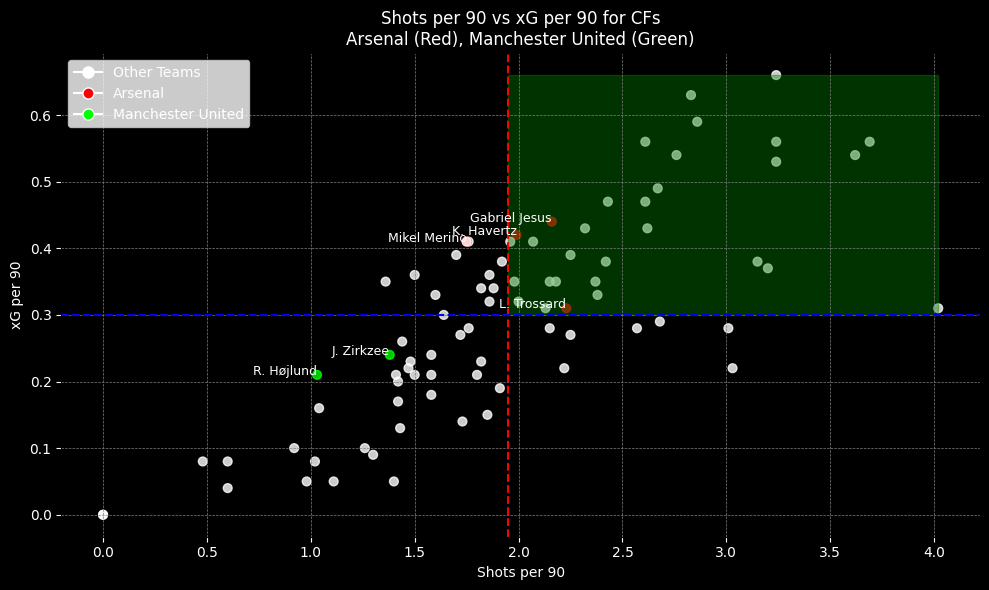

In [2]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Install openpyxl (for .xlsx support)
!pip install openpyxl

# STEP 3: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# STEP 4: Load Excel file from Google Drive
file_path = '/content/drive/MyDrive/Database March 2025/England II 2024-2025.xlsx'  # <-- update this path!
excel_file = pd.ExcelFile(file_path)
df = excel_file.parse('Search results (500)')

# STEP 5: Filter for Center Forwards
cf_players = df[df['Position'].str.contains("CF", na=False)]
cf_players_clean = cf_players.rename(columns=lambda x: x.strip())

# Identify stat columns
x_col = next((col for col in cf_players_clean.columns if 'shots per 90' in col.lower()), None)
y_col = next((col for col in cf_players_clean.columns if 'xg per 90' in col.lower()), None)

# Prepare data
plot_df = cf_players_clean[[x_col, y_col, 'Player', 'Team']].dropna()
x_mean = plot_df[x_col].mean()
y_mean = plot_df[y_col].mean()
top_xg = plot_df.sort_values(by=y_col, ascending=False).head(5)

# Assign colors
colors = []
for team in plot_df['Team']:
    if team == 'Arsenal':
        colors.append('red')
    elif team == 'Manchester United':
        colors.append('lime')
    else:
        colors.append('white')

# STEP 6: Create dark scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

ax.scatter(plot_df[x_col], plot_df[y_col], c=colors, alpha=0.8, s=40, marker='o')

# Highlight quadrant
ax.fill_betweenx(
    y=[y_mean, plot_df[y_col].max()],
    x1=x_mean, x2=plot_df[x_col].max(),
    color='green', alpha=0.4, label='Top Right Quartile'
)

# Benchmark lines
ax.axvline(x=x_mean, color='red', linestyle='--', label=f'Avg {x_col}')
ax.axhline(y=y_mean, color='blue', linestyle='--', label=f'Avg {y_col}')

# Label Arsenal and Manchester United players only
for _, row in plot_df.iterrows():
    if row['Team'] in ['Arsenal', 'Manchester United']:
        ax.text(row[x_col], row[y_col], row['Player'], fontsize=9, ha='right', color='white')

# Labels & formatting
ax.set_xlabel(x_col, color='white')
ax.set_ylabel(y_col, color='white')
ax.set_title('Shots per 90 vs xG per 90 for CFs\nArsenal (Red), Manchester United (Green)', color='white')
ax.tick_params(colors='white')
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Custom legend
custom_lines = [
    Line2D([0], [0], marker='o', color='w', label='Other Teams', markersize=8, markerfacecolor='white'),
    Line2D([0], [0], marker='o', color='w', label='Arsenal', markersize=8, markerfacecolor='red'),
    Line2D([0], [0], marker='o', color='w', label='Manchester United', markersize=8, markerfacecolor='lime')
]
legend = ax.legend(handles=custom_lines, loc='upper left')
for text in legend.get_texts():
    text.set_color("white")

plt.tight_layout()
plt.show()


In [3]:
# Install necessary library
!pip install ipywidgets --quiet

import ipywidgets as widgets
from IPython.display import display, clear_output

# Extract numeric columns that contain 'per 90'
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
per90_cols = [col for col in df.columns if 'per 90' in col.lower() and col in numeric_cols]

# Filter CFs again
cf_players = df[df['Position'].str.contains("CF", na=False)]
cf_players_clean = cf_players.rename(columns=lambda x: x.strip())

# Dropdown widgets for selecting X and Y
x_dropdown = widgets.Dropdown(options=per90_cols, description='X Axis:')
y_dropdown = widgets.Dropdown(options=per90_cols, description='Y Axis:')
button = widgets.Button(description='Generate Plot')

# Output widget
output = widgets.Output()

# Define button action
def on_button_click(b):
    with output:
        clear_output(wait=True)
        x_col = x_dropdown.value
        y_col = y_dropdown.value
        plot_df = cf_players_clean[[x_col, y_col, 'Player', 'Team']].dropna()
        x_mean = plot_df[x_col].mean()
        y_mean = plot_df[y_col].mean()

        # Color Arsenal and Man United
        colors = []
        for team in plot_df['Team']:
            if team == 'Arsenal':
                colors.append('red')
            elif team == 'Manchester United':
                colors.append('lime')
            else:
                colors.append('white')

        # Plot
        fig, ax = plt.subplots(figsize=(10, 6))
        fig.patch.set_facecolor('black')
        ax.set_facecolor('black')
        ax.scatter(plot_df[x_col], plot_df[y_col], c=colors, alpha=0.8, s=40, marker='o')
        ax.fill_betweenx([y_mean, plot_df[y_col].max()],
                         x1=x_mean, x2=plot_df[x_col].max(),
                         color='green', alpha=0.4, label='Top Right Quartile')
        ax.axvline(x=x_mean, color='red', linestyle='--', label=f'Avg {x_col}')
        ax.axhline(y=y_mean, color='blue', linestyle='--', label=f'Avg {y_col}')

        # Label only Arsenal and Man United players
        for _, row in plot_df.iterrows():
            if row['Team'] in ['Arsenal', 'Manchester United']:
                ax.text(row[x_col], row[y_col], row['Player'], fontsize=9, ha='right', color='white')

        ax.set_xlabel(x_col, color='white')
        ax.set_ylabel(y_col, color='white')
        ax.set_title(f'{x_col} vs {y_col} for CFs', color='white')
        ax.tick_params(colors='white')
        ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

        custom_lines = [
            Line2D([0], [0], marker='o', color='w', label='Other Teams', markersize=8, markerfacecolor='white'),
            Line2D([0], [0], marker='o', color='w', label='Arsenal', markersize=8, markerfacecolor='red'),
            Line2D([0], [0], marker='o', color='w', label='Manchester United', markersize=8, markerfacecolor='lime')
        ]
        legend = ax.legend(handles=custom_lines, loc='upper left')
        for text in legend.get_texts():
            text.set_color("white")

        plt.tight_layout()
        plt.show()

# Bind button
button.on_click(on_button_click)

# Display UI
display(widgets.VBox([x_dropdown, y_dropdown, button, output]))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.8 MB/s eta 0:00:00


In [6]:
import pandas as pd
from scipy.stats import zscore
def categorize_position(pos):
    if 'GK' in pos:
        return 'Goalkeeper'
    elif any(p in pos for p in ['CB', 'LB', 'RB', 'LCB', 'RCB', 'LWB', 'RWB']):
        return 'Defender'
    elif any(p in pos for p in ['CM', 'CDM', 'CAM', 'LM', 'RM']):
        return 'Midfielder'
    elif any(p in pos for p in ['ST', 'CF', 'LW', 'RW', 'LF', 'RF']):
        return 'Attacker'
    else:
        return 'Unknown'

df['Category'] = df['Position'].apply(categorize_position)
attackers_df = df[(df['Category'] == 'Attacker') & (df['Minutes played'] >= 900)].copy()

metrics = {
    'Second Striker': ['Assists per 90', 'xA per 90', 'Shot assists per 90', 'Smart passes per 90'],
    'Target Striker': ['Aerial duels per 90', 'Goals per 90'],
    'Goalscoring Striker': ['Goals per 90', 'xG per 90', 'Shots per 90', 'Touches in box per 90'],
    'Wide Playmaker': ['Dribbles per 90', 'Key passes per 90', 'Crosses per 90', 'Progressive runs per 90'],
    'Classic Winger': ['Crosses per 90', 'Dribbles per 90', 'Touches in box per 90']
}

# Score players for each role
role_scores = pd.DataFrame(index=attackers_df.index)
for role, cols in metrics.items():
    valid_cols = [col for col in cols if col in attackers_df.columns]
    role_scores[role] = attackers_df[valid_cols].apply(zscore).mean(axis=1)

# Assign best-fit role
attackers_df['Role'] = role_scores.idxmax(axis=1)
top_by_role = attackers_df.sort_values(by='Goals', ascending=False).groupby('Role').head(5)
top_by_role[['Player', 'Position', 'Role', 'Goals', 'Assists', 'Minutes played']]
# Save to your Drive (optional)
attackers_df.to_csv('/content/drive/My Drive/Recruitment/Top_Attackers_By_Role.csv', index=False)
attackers_df.to_excel('/content/drive/My Drive/Recruitment/Top_Attackers_By_Role.xlsx', index=False)


